<a href="https://colab.research.google.com/github/Avit-hodibu/Covid-19-Corona-Website/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression:

supervise ML algo


type:
- simple LR: one input and one output
- multiple LR: multiple input and one output
- polynominal LR: non linear data

## simple LR:
y= mx +c
where m = slope, c= y intercept

- plot the data
- see if it is linear
- draw best fit line minimum error


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

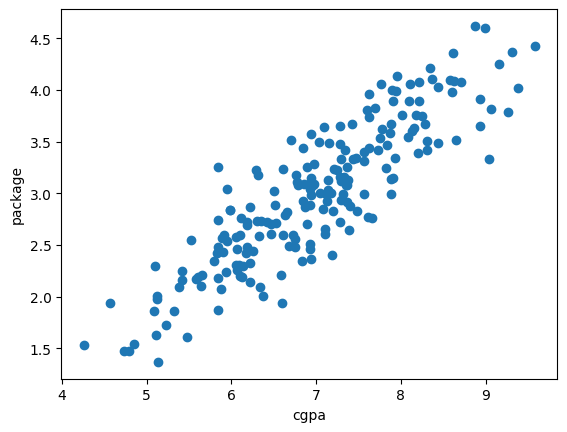

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
x= df.iloc[:,0:1]
y= df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#train algo has input shape of 1,1
#but what we are sending is 1D data so, we need to reshape
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [ ]:
#let see line how LR draw
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

NameError: name 'plt' is not defined

In [ ]:
#y=mx+c
# package = m * cgpa + c
m = lr.coef_
c = lr.intercept_
print('slope=', m)
print('intercept=', c)

slope= [0.55795197]
intercept= -0.8961119222429144


Simplly find mathamatical relationship.

m = weightage (depended)

more m more cgpa depened

less m less cgpa depened  


We need to find the value of m and c which draw line closer to all points.

m and c value can be find two method:

1. closed form solution: if you can make mathematical formula then it's closed form.

An expression or equation is in closed form if it is formed with constants, variables and a finite set of basic functions connected by arithmetic operations (+, −, ×, /, and integer powers) and function composition.

direct formula= odinary least square

2. non-closed form solution: we need to used approm to reach to value.

approx. based technique= gradient descent


Why to use gradient descent when we have direct formula
- in higher dimension it is difficult to find using formula so we need gradient descent


What we want to use
- OLS use linear regression class
- gradient descent use SGDRegressor class




formula:

b= mean y - m. mean X

m = sum i to n (Xi- mean X)(yi - mean y)/ sum i to n (Xi - mean X)^2


 Best fix line = line that passes near from every point.

 distance between line and point =Di.

loss function J =Error function E = sum i to n (Di)^2

1. square to penilized the outliers
2. differentiation at point

we need m and b which minimized the loss function.

what does the distance between point and line represent?

it show the according to line point should be line but acutually in reality it is in point. so, my line is making error.

yi = actual point , y hat = predicted point

```Di = (yi - y hat)```

```E= sum i to n (yi - y hat)^2```

we need minmum E.

yi hat = m Xi + b

E(m,b)= sum i to n (yi- (m Xi + b))^2  

Let's  consider b=0 is constant.Now, it only depend on m.

E(m)= sum i to n (yi- (m Xi))^2

then when increasing and decreasing the value of m give parabolic Error value

Now, let's  consider m=0 is constant.Now, it only depend on b.

E(b)= sum i to n (yi- (b))^2

then when increasing and decreasing the value of b give parabolic Error value

our error function with respect to m and b be like gradient descent.


maxima and minima:

in minima slope is zero

derivative of m and b

slope = derivative = 0

E(x)= dE/dx = 0

f(x,y)

```
dE/dm = 0, dE/db = 0
```

by sloving this equation we slove and find the value of m and b.

dE/db = d (sum i to n (yi- m. Xi- b)^2)/db = 0

= sum i to n d(yi- m. Xi - b)^2/db = 0

= sum i to n -2(yi- m. Xi - b) = 0

= sum i to n (yi- m. Xi - b) = 0

= sum i to n (yi)/n - sum i to n (mXi)/n - sum i to n (b)/n = 0/n

= mean y - m . mean X - nb/n =0

= mean y - m . mean X = b

same will be done for dE/bd =0

this will give

m=  sum i to n (Xi - mean X)(yi - mean y)/ sum i to n (Xi- mean X)^2







In [ ]:
class myLR:
  def __init__(self):
    self.m= None
    self.b= None

  def fit(self,X_train,y_train):
    num=0
    den=0
    # for m
    for i in range(X_train.shape[0]):
      num= num + (X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())
      den= den + (X_train[i] - X_train.mean())**2
    self.m= num/den
    # for b
    self.b= y_train.mean() - (self.m * X_train.mean())

  def predict(self,X_test):
    return self.m * X_test + self.b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = myLR()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.predict(X_test[0])

3.891116009744203

## Multiple LR:
input is more than one col.since increasing col means increase in dimension.

3D we draw a plane like in 2D line. in 4D and above we draw hyperplane.

Like in simple LR
y = m.x + b

here, for 3D
y = m.x1+ n.x2 + b

y = b0 + b1.x1 + b2.x2

y = b0 + sum i to n bi. xi

coeff = weight

b, b0 = offset

We need to find hyperplane which is closest to all points(data).




working in 4D data where 3 is input and 1 is output.

y pred=y hat= b0 + b1x1 + b2x2 + b3x3

for n row of data and m col.

y hat=

[ y hat] = [b0 b1x11 b2x12..... bmX1m]

[ y hat] = [b0 b1x21 b2x22..... bmX2m]

......................................

[ y hat] = [b0 b1xn1 b2xn2..... bmXnm]

this can be written as into two matrix multi :

[1 x11 x12 ..... x1m] [b0]

[1 x21 x22 ..... x2m] [b1]

..........................

[1 xn1 xn2 ..... xnm] [bm]

Y hat = XB  .... equ I

now we need to find coeff B

now output Y=

[y1]

[y2]

.

.

[yn]

e = Y - Y hat =

[y1 - y1 hat]

[y2 - y2 hat]

.............

[yn - yn hat]

Error (loss fun)= E= e(transpose) . e

this gives

E = loss fun= sum i to n (yi -yi hat)^2

E= e(transpose) . e =  (Y - Y hat)T . (Y - Y hat)

= (Y T - Y hat T) (Y - Y hat)

Y hat = XB  .... equ I

= (Y T - (XB) T) (Y - XB)

= Y T .Y - Y T. XB - (XB)T. Y + (XB)T . XB

since Y T. XB == (XB)T. Y. so,

E= Y T .Y -2 (Y T. XB) + XT BT . XB


min value slope =0. then

dE/dB = d[Y T .Y -2 (Y T. XB) + XT BT . XB]/ dB = 0

0= 0 - 2YT X + 2XT X BT

2YT X= 2XT X BT

after solving it will give

B = ((XT X)^-1) XT Y

where X = X_train, Y= Y_train



In [ ]:
 import numpy as np
 from sklearn.datasets import load_diabetes

In [ ]:
X, y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Using sk LR**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968

In [ ]:
print("coef",lr.coef_)
print("intercept",lr.intercept_)

coef [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
intercept 151.88331005254167


**OWN LR**

In [ ]:
class myMultiLR:
  def __init__(self):
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    # insert(array in which you want to change,in which index,what change, in which axis )

    # calcuate the coeffs
    # np.linalg.inv() give inverse
    betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept_ = betas[0]
    self.coef_ = betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef_) + self.intercept_
    return y_pred

In [ ]:
lr= myMultiLR()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.43993386615689634

In [ ]:
print("coef",lr.coef_)
print("intercept",lr.intercept_)

coef [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
intercept 151.88331005254165


# Gradient Descent

why GD?

the time complexity of ols(linear Regression) is higher to find m and b because of inverse B = ((XT X)^-1) XT Y. this (XT X)^-1.

In higher dim it will impact.

for gd we use SGDRegressor


a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for minimizing a differentiable multivariate function.

- that must be diferentiable at all points
- this give minima
- can use in Tsna, linear Reg, Logistic Reg and backbone of deep learning



in ols:

Loss func= sum i to n (yi - yi hat)^2

= sum i to n (yi- mxi - b)^2 since yi hat = mxi + b

L(m,b) so, it depend on m and b.


Let see that we know m (slope) from linear Regression slove
lr.coeff_

***to find  b***

since b is square so, it is parabolic graph it create. so in this graph we need to find where L is minimum.

step 1: select random b

step 2: we need to increase b or decrease b value and calculate slope

dy/dx= d(fun equn)/dx and fill the value of x will give slope value.

step 3: if slope -ve then increment the value of b otherwise if slope +ve than decrement of value of b

b new = b old -learning rate * slope, mostly learning rate = 0.01

Step 4: keep iteration untill you find minima that mean bnew - b old is less than 0.0001 or you stop in specific iteration(epoch).




**Math**

thinking that m is known. find only b

start with b random value.

take iteration

for i in epochs: b new = bold - learning rate * slope

to find the value of slope:

Loss func= sum i to n (yi - yi hat)^2

= sum i to n (yi- mxi - b)^2 since yi hat = mxi + b

dL/db = d sum i to n (yi- mxi - b)^2/ db

dL/db= -2 sum i to n (yi- mxi - b) . this is slope

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

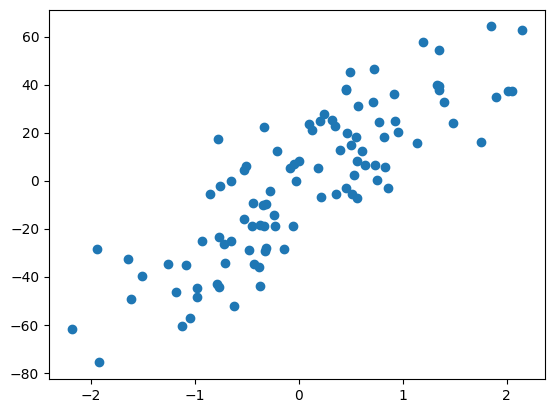

In [ ]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [ ]:
m= lr.coef_[0]
print(m)

27.82809103252014


In [ ]:
class GDRegressor:
  def __init__(self, learning_rate, epochs):
    #using m from linear regression.
    self.m = m
    self.b = 0
    self.learning_rate = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    #calculate the b using GD
    for i in range(self.epochs):
      loss_slope= -2 * np.sum(y - self.m*X.ravel() - self.b)
      self.b = self.b - (self.learning_rate * loss_slope)
    print( self.b)

In [ ]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)

-2.2947445582095325


now performing GD:

step 1: initalized random value for m and b

let's consider, m= 1 and b =0

step 2: epoch value and learning rate

for i in epochs:
```
this slope  come from dL/db
```
b= b-learning rate* slope

```
this slope  come from dL/dm
```
m= m -learning rate* slope

Loss func= sum i to n (yi - yi hat)^2

L(m,b)= sum i to n (yi- mxi - b)^2 since yi hat = mxi + b

this give m direction

dL/dm = d sum i to n (yi- mxi - b)^2/ dm

dL/dm= -2 sum i to n (yi- mxi - b)xi
. this is slope for m

this give b direction

dL/db = d sum i to n (yi- mxi - b)^2/ db

dL/db= -2 sum i to n (yi- mxi - b) . this is slope for b



In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

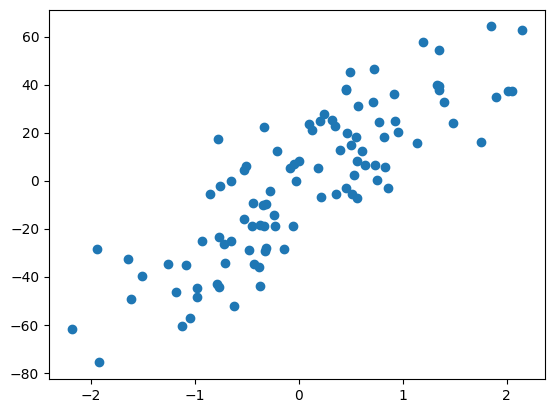

In [ ]:
plt.scatter(X,y)

In [ ]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    #randomly selecting value m=100 and b =-120
    #you can chose any value for them
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    # calcualte the b using GD
    for i in range(self.epochs):

      #loss with respect to b = slope
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
      #loss with respect to m = slope
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.m,self.b)

  def predict(self,X):
    return self.m * X + self.b


The .ravel() function in Python (specifically in NumPy) flattens a multi-dimensional array into a one-dimensional array.

In [ ]:
import numpy as np
arr = np.array([[1, 2], [3, 4]])
print(arr.ravel())  # Output: [1 2 3 4]

[1 2 3 4]


In [ ]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)
# this give m and b

27.828091872608653 -2.2947448944994893


In [ ]:
gd.predict(1)

25.533346978109165

Differentiable loss fuction is needed for slope, then GD can be use.

b= bold-learning rate * slope



learning rate smaller find in more epoch and higher will may skip the minimum loss. chosing correct learning rate.



you may start near local minimum means you will never reach global minimum. It think local minimum is answer. same with plateau, the value is not going to change . you have to run many epoch so you may runout of epoch. then this is minimun value of loss function which is actually not.

This case happen in deep learning.

## Batch GD
 in this, all the value is use to find the slope and only it will make changes

m n = m 0 - lr* slope

b n = b 0 - lr* slope

it is slow

**Math:**

Let take 2 input row and 1 output row.

Y = B0 + B1X1 + B2X2
output = intercpet + coef. row 1 + coef. row 2

1. put random values of b0, b1, b3
2. epoch= 100 and lr=0.001:

L(b0,b1,b2)= loss fuc

b0=b0-lrslope => slope=dL/db0

b1=b1-lrslope => slope=dL/db1

b2=b2-lrslope => slope=dL/db2

L=1(sum of i to n yi- yi hat)^2/n

dL/db0 = -2(sum of i to n yi- yi hat) /n

dL/db1 = -2(sum of i to n yi- yi hat)Xi1 /n  => Xi1= value of X of 1st col

dL/db2 = -2(sum of i to n yi- yi hat)Xi2 /n  => Xi2= value of X of 2nd col

dL/dbm = -2(sum of i to n yi- yi hat)Xim /n  => Xim= value of X of mth col



In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [7]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

**making own GD regressor**

In [8]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self,X_train,y_train):
    #init coeffs
    self.intercept_ = 0
    # putting m = 1
    self.coef_ = np.ones(X_train.shape[1]) # X_train.shape[1] gives the number of column(input) in data
    #calculate the coeffs
    for i in range(self.epochs):
      #update all the coeff and the intercept
      y_hat = np.dot(X_train,self.coef_) + self.intercept_
      intercept_der = -2 * np.mean(y_train - y_hat)
      self.intercept_ = self.intercept_ - (self.lr * intercept_der)

      coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0] # X_train.shape[0] row of col
      self.coef_ = self.coef_ - (self.lr * coef_der)

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [21]:
gdr = GDRegressor(0.001,1000)

In [22]:
gdr.fit(X_train,y_train)

In [23]:
y_pred = gdr.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

-0.13176512082432024

## Stochastic GD:
the update of slope is done under the single row bases.

It is fast. Suited for larger data


## Mini Batch GD:
 Here batch size is define. After taking the batch size then only it will make update in slope.

# Regression Metrics

MAE(mean absolute error):

absolute error = actual value- predicted value = yi - y hat

mean absolute error = sum i to n absolute error/ n

Ad:
- mea unit is equal to unit of y (output)
- robust outliers

Dis:
- graph is not differeiatable

MSE(mean squared error):

MSE: sum i to n (actual value- predicted value)^2 = (yi - y hat)^2/ n

Ad:
- graph is differeiantable at all the points
- can be use as loss func

dis:
- mse unit is square of y unit
- outliers are more penalized


RMSE(root mean squared error):

RMSE: root(sum i to n (actual value- predicted value)^2/n) = root((yi - y hat)^2/ n)

- use DL

Ad:
- can be use as loss func
- unit is same

dis:
- outlier are more penalized

R2 score(coeff of determination):

we compare linear regression line is how much better than mean line.

R2= 1- (SSr/SSm)

sum of squared error in the regression line SSr

sum of squared error in the mean line SSm

R2 = 1 - ([sum i to n (actual value- predicted value)^2]reg/[sum i to n (actual value- predicted value)^2]mean)

R2= 0 when mean line and regression line are alline in same place with each other. This means that it is worst

R2=1 when regression line is not making any mistake that give error 0 in reg line. This means tha best case

make sure you are going towards 1

what if R2 score is neg?
this means reg line is making more mistake than mean line

R2 score 0.80 means input explain 80% of variance in output.

The problem occur when irrelevent input make impact on output. To solve this problem we have Adjusted R2.

R2 adj = 1 - [((1- R2)(n-1))/ (n-1-k)]

n= no. of rows, k = total number of independent col

For irrelevent : denumerator is decrease because of adding another col but numerator will remain same or increase by little. when sub in 1 will decrease.

For relevent: R2 score will increase means numerator decrease so, R2 adj will increase.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

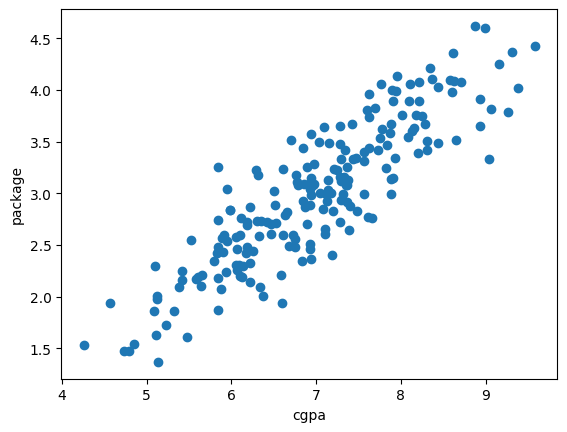

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'package')

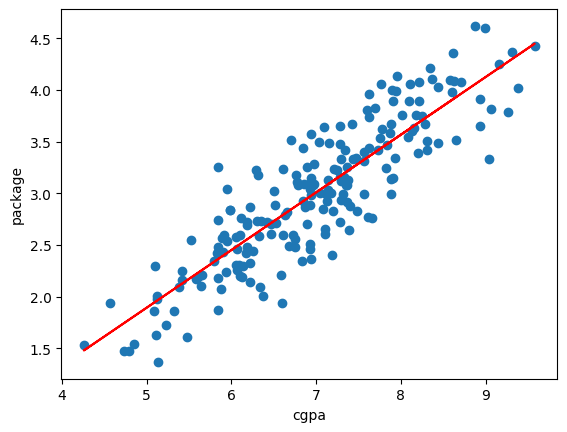

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred= lr.predict(X_test)

In [ ]:
print("MAE", mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score", r2_score(y_test,y_pred))

MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2 score 0.780730147510384


In [ ]:
#adj R2 score
r2 = r2_score(y_test,y_pred)
1- ((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7749598882343415

In [ ]:
# irrelevent
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.401119,3.26
1,5.12,0.577198,1.98
2,7.82,0.132199,3.25
3,7.42,0.770892,3.67
4,6.94,0.537675,3.57


Text(0, 0.5, 'Package(in lpa)')

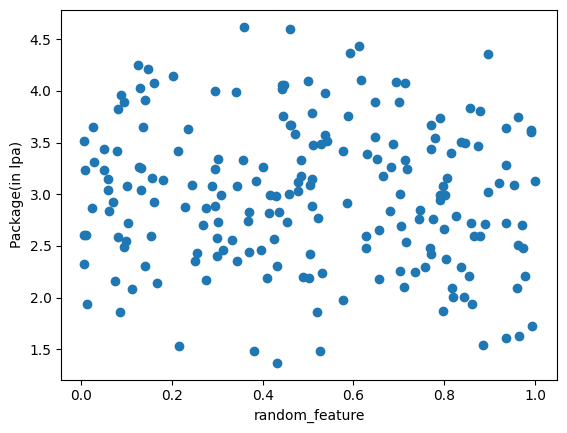

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
r2adj= 1- ((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adj R2 score of irrelevent col added",r2adj)

R2 score 0.7801664716729012
Adj R2 score of irrelevent col added 0.7682835782498147


Text(0, 0.5, 'Package(in lpa)')

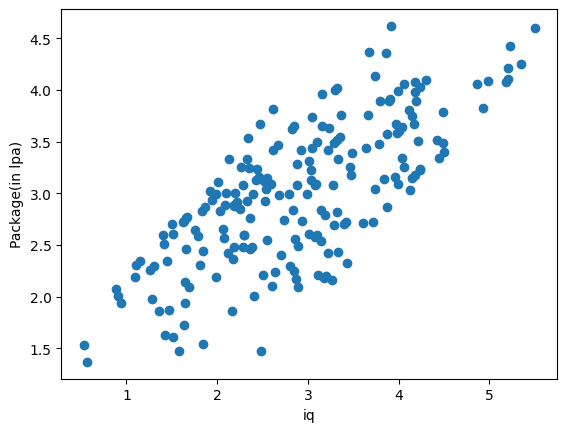

In [ ]:
# relevent
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
r2adj= 1- ((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adj R2 score of relevent col added",r2adj)


R2 score 0.8525712402458603
Adj R2 score of relevent col added 0.8446021180969878
